In [2]:
#%load_ext autoreload
#autoreload 2

#.libPaths()

#ip <- as.data.frame(installed.packages()[,c(1,3:4)])
#print(ip)
#rownames(ip) <- NULL
#ip <- ip[is.na(ip$Priority),1:2,drop=FALSE]
#print(ip, row.names=FALSE)

library(Seurat)
# cowplot enables side-by-side ggplots
library(cowplot)
library(dplyr)
#library(annotables)
source("tooling_scripts/seurat.R")

dir.in <- "/home/pesho/repoks/bioviz/in/clonality_tables/"
dir.out <- "/home/pesho/repos/bioviz/out/seurat/"

ERROR: Error in tbl_vars(y): object 'grch38' not found


In [6]:
#batches <- ReadBatches(SchH.good)
batches <- ReadBatches(batches.good, dir.in, dir.out)
batches <- FilterCellsInBatches(batches, dir.out, nGene.limits, nUMI.limits, percent.mito.limits)
DE_all(batches, tests=c("DESeq2"))

ERROR: Error in ReadBatches(batches.good, dir.in, dir.out): could not find function "ReadBatches"


In [7]:
source("tooling_scripts/seurat.R")

tests <- de.tests
# "roc",  # no "p_val" column
# "negbiom", # Error in rownames(x = to.return): object 'to.return' not found
#tests <- c("DESeq2")
DE_all(batches, tests=tests)  #'DESeq2'

ERROR: Error in tbl_vars(y): object 'grch38' not found


In [38]:
#require(venneuler)
#v <- venneuler(c(A=450, B=1800, "A&B"=230))
#plot(v)

In [79]:
source("tooling_scripts/seurat.R")
options(warn=-1)

for (batch in batches) {
    print(batch)
    spikeins <- data.frame(symbol=batch@cell.names) %>%
        filter(grepl("^Spike",symbol))
    print(spikeins)
}

#markers <- FindMarkers(object = batch, ident.1 = 'clonal', ident.2='nonclonal', min.pct = 0.25)
#print(markers)

An object of class seurat in project SchH_SE 
 21181 genes across 41 samples.
[1] symbol
<0 rows> (or 0-length row.names)
An object of class seurat in project SchH_SL 
 17981 genes across 16 samples.
[1] symbol
<0 rows> (or 0-length row.names)
An object of class seurat in project WaG_BL-C 
 24044 genes across 46 samples.
[1] symbol
<0 rows> (or 0-length row.names)
An object of class seurat in project WaG_SE 
 21708 genes across 54 samples.
[1] symbol
<0 rows> (or 0-length row.names)
An object of class seurat in project FrK_BL 
 19121 genes across 48 samples.
[1] symbol
<0 rows> (or 0-length row.names)
An object of class seurat in project FrK_SE 
 24447 genes across 57 samples.
[1] symbol
<0 rows> (or 0-length row.names)
An object of class seurat in project FrK_SL 
 19158 genes across 55 samples.
[1] symbol
<0 rows> (or 0-length row.names)


In [62]:
print(markers)
markers <- markers %>%
#    tibble::rownames_to_column("symbol") %>%
    filter(!grepl("^(TRA|TRB)", symbol))

           symbol        p_val  avg_logFC pct.1 pct.2   p_val_adj
1          KCNMA1 1.577996e-07  1.7627977 1.000 0.778 0.003342354
2      ST6GALNAC1 2.568537e-05  1.0770888 0.870 0.389 0.544041738
3             TOX 2.808365e-05  0.5357546 0.870 0.333 0.594839703
4           RPL41 4.073327e-05 -0.4221654 1.000 1.000 0.862771312
5           IKZF3 4.858976e-05  0.3540513 1.000 0.722 1.000000000
6           PSMB1 5.388868e-05 -0.9794674 1.000 1.000 1.000000000
7       MTRNR2L11 7.083348e-05  0.2753500 1.000 1.000 1.000000000
8            SOX4 7.354850e-05  0.3772406 0.870 0.444 1.000000000
9          FBXO32 9.021787e-05  1.1423851 0.913 0.667 1.000000000
10          FXYD7 1.355984e-04 -0.6704828 0.652 0.944 1.000000000
11       MTRNR2L6 1.365955e-04  0.5576730 1.000 1.000 1.000000000
12          GSTA4 1.410325e-04  0.5531051 0.696 0.111 1.000000000
13       MTRNR2L8 1.758245e-04  0.5772474 1.000 1.000 1.000000000
14         RNF19A 2.541177e-04  1.1446406 1.000 1.000 1.000000000
15       M

 [1] "KCNMA1"     "ST6GALNAC1" "TOX"        "RPL41"      "IKZF3"     
 [6] "PSMB1"      "MTRNR2L11"  "SOX4"       "FBXO32"     "FXYD7"     
[11] "MTRNR2L6"   "GSTA4"      "MTRNR2L8"   "RNF19A"     "MRFAP1L1"  
[16] "PLK2"       "HPGDS"      "MTRNR2L1"   "NUFIP2"     "NCALD"     


Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”

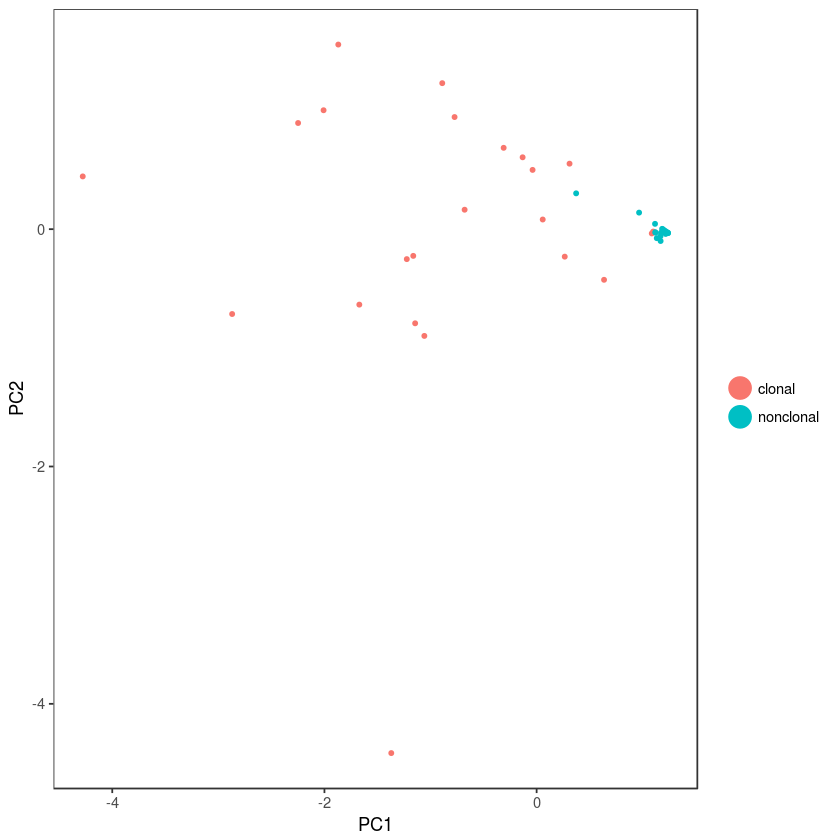

Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”

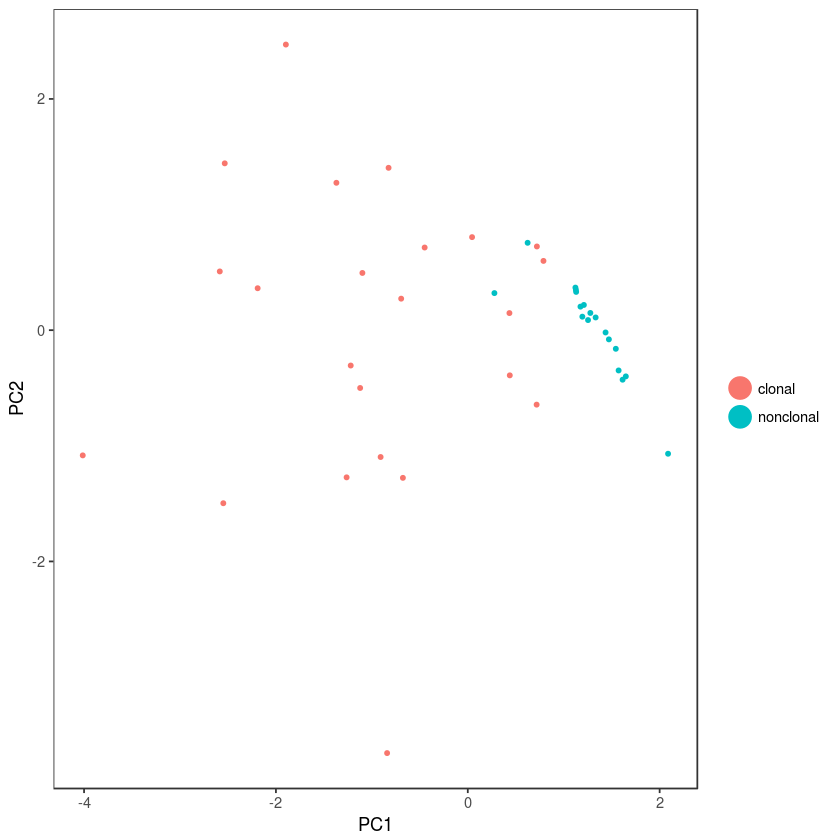

Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”

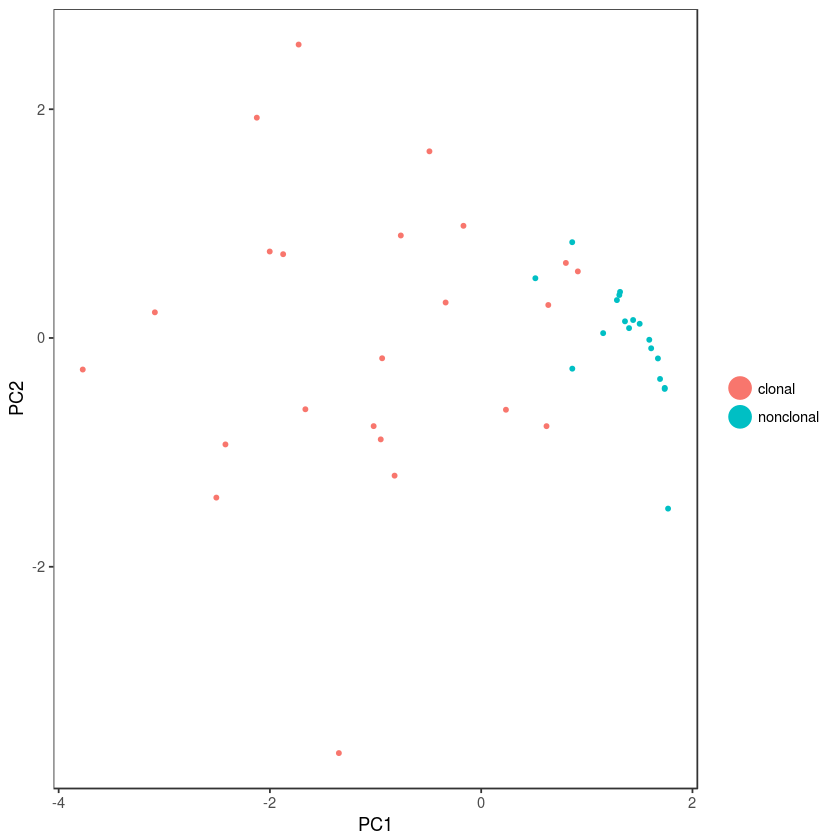

Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”

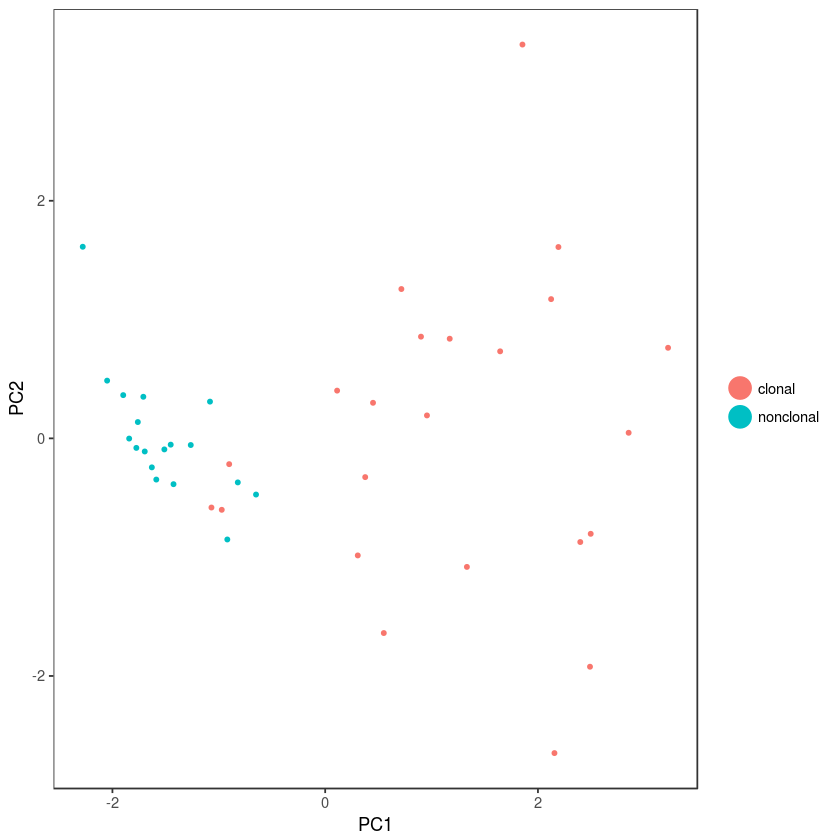

Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”

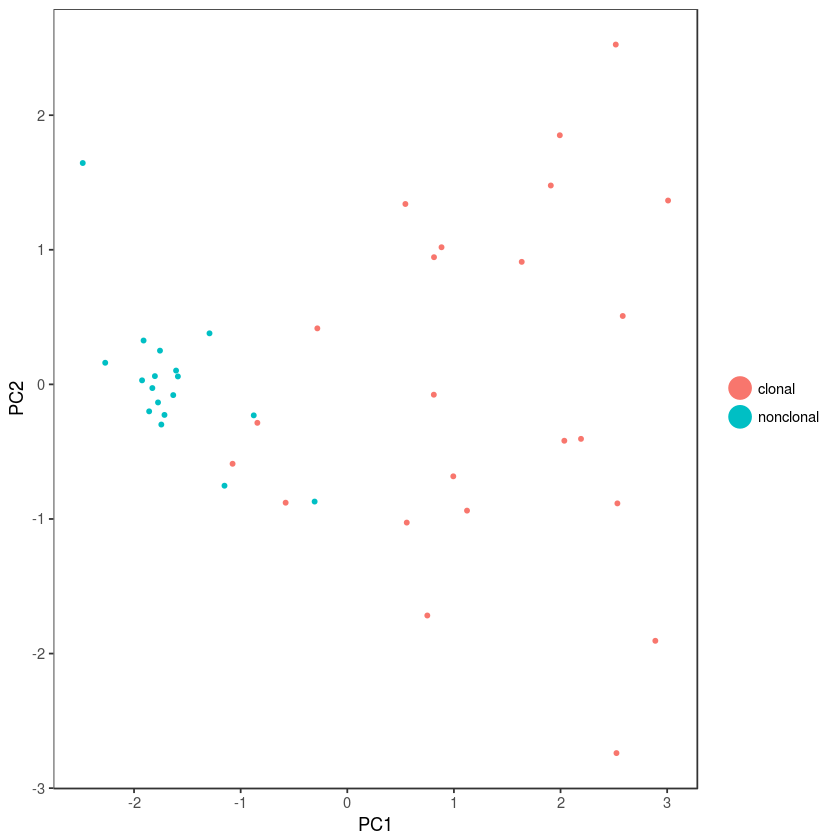

Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”Warning message in irlba(A = t(x = data.use), nv = pcs.compute, ...):
“did not converge--results might be invlaid!; try increasing maxit or fastpath=FALSE”

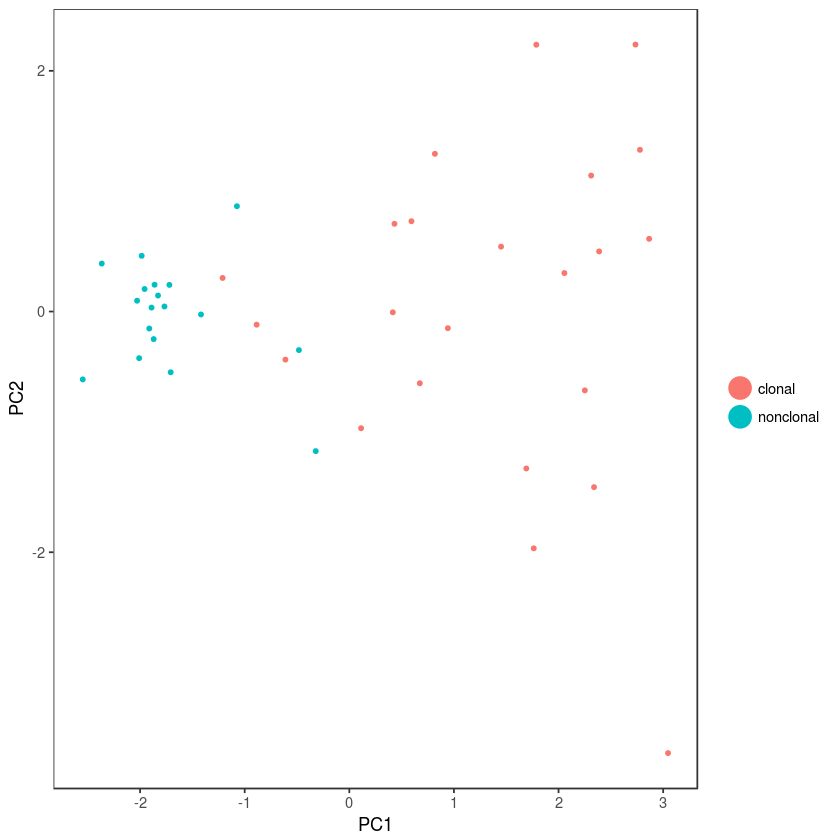

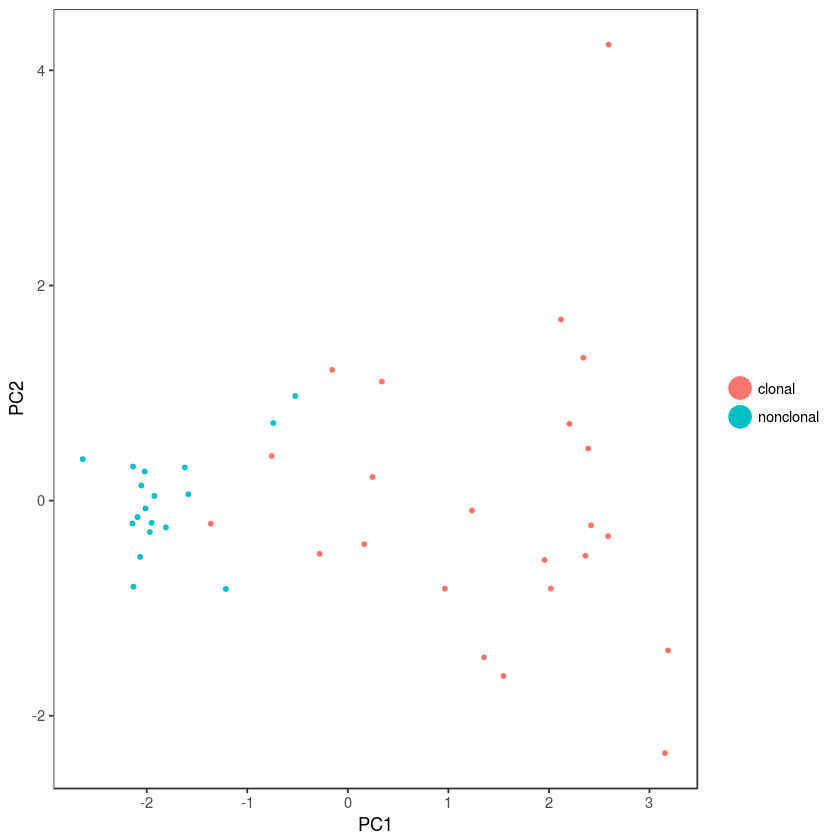

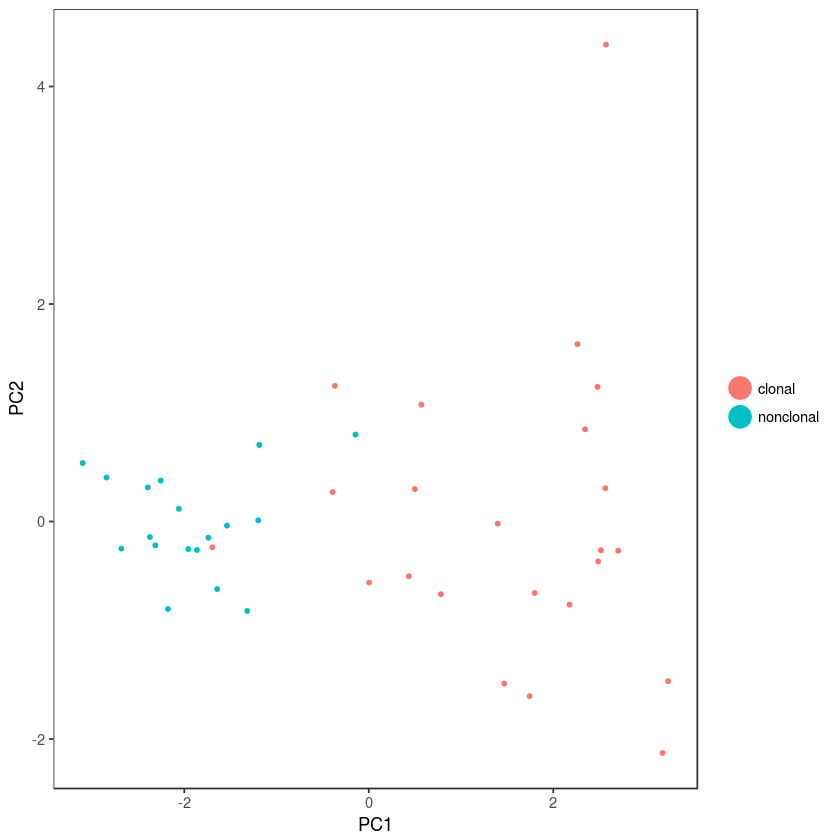

In [38]:
#print(head(markers))
print(head(markers$symbol, n=20))

for (top.genes in 3:10) {
    genes <- head(markers$symbol, n=top.genes)
    #genes <- Park.genes
    #genes <- batch@var.genes
    batch_tmp <- RunPCA(object = batch, do.print = FALSE, pcs.print = 1:5, pc.genes = genes)
#    par(mfrow=c(2,1))
    PCAPlot(object = batch_tmp, dim.1 = 1, dim.2 = 2)
}
#batch <- RunTSNE(object = batch, dims.use = 1:10, do.fast = TRUE)
#p1 <- DimPlot(object = batch, reduction.use = "tsne", pt.size = 0.5, do.return = TRUE)
#TSNEPlot(object = batch)

In [60]:
b <- batches[[1]]
#head(b@data)
FetchData(b, vars.all = 'data', use.raw = TRUE)
#tibble::rownames_to_column(FetchData(b), "enst") #%>%
#b@raw.data %>%
#    head(20)
#    head(20) %>% 
#    inner_join(grch38_tx2gene, by=c("enst"="enstxp")) %>%
#    inner_join(grch38, by=c("ensgene"="ensgene")) %>% 
#    select(enst, p_val, avg_logFC, pct.1, pct.2, p_val_adj, symbol) %>% 
#    as.data.frame()
    #pander::pandoc.table(split.table=100, style="rmarkdown")

ERROR: Error in FetchData(b, vars.all = "data", use.raw = TRUE): Error: data not found


In [229]:
pca <- function(b) {
    print(b)
    b <- RunPCA(object = b, do.print = TRUE, pcs.print = 1:5, genes.print = 5, pcs.compute = 15)
    PCHeatmap(object = b, pc.use = 1, do.balanced = TRUE, label.columns = FALSE)
    VizPCA(object = b, pcs.use = 1:2)
    PCAPlot(object = b, dim.1 = 1, dim.2 = 2)
}
pca(batches[[1]])
#pca(noncl)

An object of class seurat in project WaG_BL-C 
 97913 genes across 46 samples.


ERROR: Error in PrepDR(object = object, genes.use = pc.genes, use.imputed = use.imputed, : Variable genes haven't been set. Run MeanVarPlot() or provide a vector
          of genes names in genes.use and retry.


In [230]:
cca <- function(batch, id1, id2) {
    hvg.b1 <- rownames(x = head(x = b1@hvg.info, n = 2000))
    hvg.b2 <- rownames(x = head(x = b2@hvg.info, n = 2000))
    hvg.union <- union(x = hvg.b1, y = hvg.b2)
    print(length(hvg.union))
    
    #b12 <- RunCCA(object = b1, object2 = b2, num.cc = 15)
    #b1@meta.data[, "protocol"] <- "bla1"
    #b2@meta.data[, "protocol"] <- "bla2"
    
    bbatch <- RunCCA(object = bbatch, group1 = id1, group2 = id2, genes.use = hvg.union, num.cc = 15)
    p1 <- DimPlot(object = batch, reduction.use = "cca", group.by = "protocol", pt.size = 0.5, do.return = TRUE)
    p2 <- VlnPlot(object = batch, features.plot = "CC1", group.by = "protocol", do.return = TRUE)
    plot_grid(p1, p2)
}
cca(batches[[1]], "clonal", "nonclonal")

ERROR: Error in head(x = b1@hvg.info, n = 2000): object 'b1' not found
